<a href="https://colab.research.google.com/github/nishitmv/ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/sample_data/Classification_train.csv")

# Remove rows where 'Label' is 3
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)

features = df.drop(columns=["Date", "Time", "Label"]).values.astype('float32')
labels = df["Label"].values.astype('int')

features_tensor = torch.tensor(features)
labels_tensor = torch.tensor(labels)

print(features_tensor)
print(labels_tensor)

features_train, features_test, labels_train, labels_test = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)

print(features_train)
print(features_test)
print(labels_train)
print(labels_test)

train_features_dataloader = DataLoader(features_train,batch_size=8, shuffle=False)
labels_train_dataloader = DataLoader(labels_train, batch_size=8, shuffle=False)
test_features_dataloader = DataLoader(features_test, batch_size=8, shuffle=False)
labels_test_dataloader = DataLoader(labels_test, batch_size=8, shuffle=False)

cuda
tensor([[   86., 10269., 10721.,  ..., 10590., 10411., 10329.],
        [   86., 10364., 10907.,  ..., 10493., 10398., 10357.],
        [   86., 10329., 10793.,  ..., 10533., 10427., 10265.],
        ...,
        [   88., 10412., 10780.,  ..., 11070., 10909., 10696.],
        [   88., 10697., 11502.,  ..., 10700., 10509., 10426.],
        [   88., 10483., 11227.,  ..., 10993., 10738., 10504.]])
tensor([0, 1, 0,  ..., 0, 0, 0])
tensor([[   86., 10366., 10551.,  ..., 10771., 10665., 10521.],
        [   87., 10669., 11295.,  ..., 10618., 10519., 10384.],
        [   86., 10454., 10833.,  ..., 10416., 10352., 10278.],
        ...,
        [   85., 10363., 10615.,  ..., 10769., 10658., 10504.],
        [   86., 10395., 10971.,  ..., 10688., 10635., 10520.],
        [   88., 10319., 11172.,  ..., 10927., 10680., 10500.]])
tensor([[   88., 10349., 11144.,  ..., 10971., 10707., 10510.],
        [   87., 10864., 11726.,  ..., 10625., 10436., 10367.],
        [   87., 10453., 11161.,  ...,

torch.Size([7080, 56])
Epoch 1/20, Loss: 0.05769459158182144
Epoch 2/20, Loss: 0.053880415856838226
Epoch 3/20, Loss: 0.2896130383014679
Epoch 4/20, Loss: 0.5313727259635925
Epoch 5/20, Loss: 0.2637860178947449
Epoch 6/20, Loss: 0.34415119886398315
Epoch 7/20, Loss: 0.17916236817836761
Epoch 8/20, Loss: 0.41560494899749756
Epoch 9/20, Loss: 0.37984445691108704
Epoch 10/20, Loss: 0.3768514394760132
Epoch 11/20, Loss: 0.37681618332862854
Epoch 12/20, Loss: 0.3769085705280304
Epoch 13/20, Loss: 0.3769450783729553
Epoch 14/20, Loss: 0.37695592641830444
Epoch 15/20, Loss: 0.376958966255188
Epoch 16/20, Loss: 0.37695980072021484
Epoch 17/20, Loss: 0.3769599497318268
Epoch 18/20, Loss: 0.37696021795272827
Epoch 19/20, Loss: 0.3769601285457611
Epoch 20/20, Loss: 0.3769601285457611


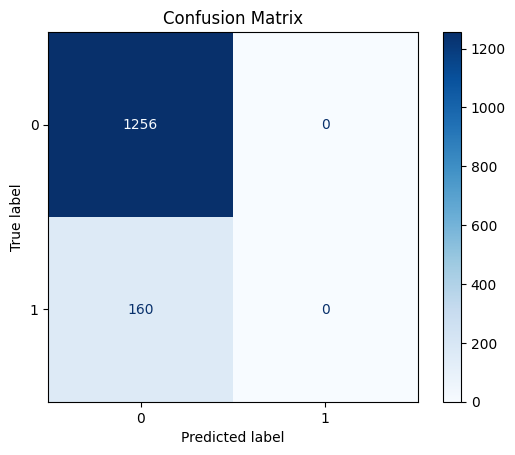

Test Accuracy: 88.70%


In [90]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature, label in zip(test_features_dataloader, labels_test_dataloader):
    predictions = model(feature)
    _ , predicted = torch.max(predictions.data, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()
    all_labels.extend(label.numpy())
    all_predictions.extend(predicted.numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [55]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
  for feature, label in zip(test_features_dataloader, labels_test_dataloader):
    predictions = model(feature)
    _ , predicted = torch.max(predictions.data, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

torch.Size([7080, 56])
Epoch 1/20, Loss: 0.43531957268714905
Epoch 2/20, Loss: 0.422747939825058
Epoch 3/20, Loss: 0.4879162907600403
Epoch 4/20, Loss: 0.4872649312019348
Epoch 5/20, Loss: 0.856556236743927
Epoch 6/20, Loss: 0.1209883987903595
Epoch 7/20, Loss: 0.2259969711303711
Epoch 8/20, Loss: 0.31641095876693726
Epoch 9/20, Loss: 0.37361541390419006
Epoch 10/20, Loss: 0.5579010248184204
Epoch 11/20, Loss: 0.5877382755279541
Epoch 12/20, Loss: 0.3943951427936554
Epoch 13/20, Loss: 0.5735989809036255
Epoch 14/20, Loss: 0.34587159752845764
Epoch 15/20, Loss: 0.5687137246131897
Epoch 16/20, Loss: 0.401923805475235
Epoch 17/20, Loss: 0.4445112347602844
Epoch 18/20, Loss: 0.3818087875843048
Epoch 19/20, Loss: 0.3799836337566376
Epoch 20/20, Loss: 0.3157077431678772
Test Accuracy: 88.70%


In [78]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
  for feature, label in zip(test_features_dataloader, labels_test_dataloader):
    predictions = model(feature)
    _ , predicted = torch.max(predictions.data, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

torch.Size([7080, 55])
Epoch 1/20, Loss: 0.5600709319114685
Epoch 2/20, Loss: 0.44888246059417725
Epoch 3/20, Loss: 0.47052308917045593
Epoch 4/20, Loss: 0.4355638027191162
Epoch 5/20, Loss: 0.4214754104614258
Epoch 6/20, Loss: 0.48303738236427307
Epoch 7/20, Loss: 0.43345004320144653
Epoch 8/20, Loss: 5.695292949676514
Epoch 9/20, Loss: 0.3777337074279785
Epoch 10/20, Loss: 0.5524433851242065
Epoch 11/20, Loss: 0.43219661712646484
Epoch 12/20, Loss: 0.2558917999267578
Epoch 13/20, Loss: 0.3155288100242615
Epoch 14/20, Loss: 0.3768174648284912
Epoch 15/20, Loss: 0.4388313293457031
Epoch 16/20, Loss: 0.1899043321609497
Epoch 17/20, Loss: 0.37691500782966614
Epoch 18/20, Loss: 0.3769243061542511
Epoch 19/20, Loss: 0.5022397041320801
Epoch 20/20, Loss: 0.2518562078475952
Test Accuracy: 88.70%


torch.Size([7080, 56])
Epoch 1/20, Loss: 0.6411665081977844
Epoch 2/20, Loss: 0.5195528864860535
Epoch 3/20, Loss: 0.47065943479537964
Epoch 4/20, Loss: 0.38446706533432007
Epoch 5/20, Loss: 0.3367609679698944
Epoch 6/20, Loss: 0.3697843849658966
Epoch 7/20, Loss: 0.3854035437107086
Epoch 8/20, Loss: 0.3677274286746979
Epoch 9/20, Loss: 0.36816099286079407
Epoch 10/20, Loss: 0.39171290397644043
Epoch 11/20, Loss: 0.3821541666984558
Epoch 12/20, Loss: 0.37226754426956177
Epoch 13/20, Loss: 0.3733217716217041
Epoch 14/20, Loss: 0.3906169831752777
Epoch 15/20, Loss: 0.38791778683662415
Epoch 16/20, Loss: 0.38857150077819824
Epoch 17/20, Loss: 0.38426294922828674
Epoch 18/20, Loss: 0.3868239223957062
Epoch 19/20, Loss: 0.3840950131416321
Epoch 20/20, Loss: 0.37431982159614563
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[[1230   26]
 [   1  159]]
[

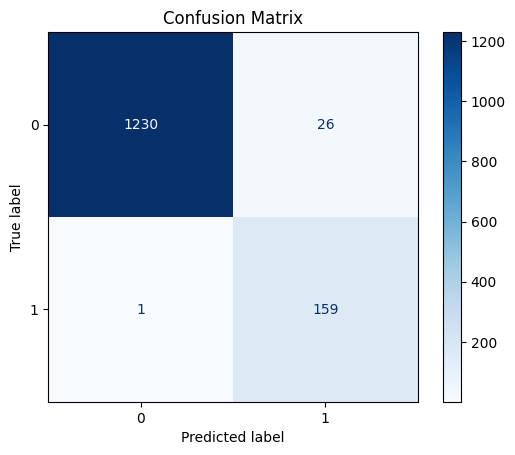

Test Accuracy: 88.70%


In [88]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predictions = model(feature_test)
    _ , predicted = torch.max(predictions.data, 1)
    total += label_test.size(0)
    correct += (predicted == label_test).sum().item()
    cm = confusion_matrix(all_labels, all_predictions)
    print(cm)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [71]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

epochs=10
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
  for feature, label in zip(test_features_dataloader, labels_test_dataloader):
    predictions = model(feature)
    _ , predicted = torch.max(predictions.data, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

torch.Size([7080, 56])
Epoch 1/10, Loss: 43.22721862792969
Epoch 2/10, Loss: 3.620469093322754
Epoch 3/10, Loss: 1.401216745376587
Epoch 4/10, Loss: 1.8482460975646973
Epoch 5/10, Loss: 3.79664945602417
Epoch 6/10, Loss: 2.8821756839752197
Epoch 7/10, Loss: 1.0664401054382324
Epoch 8/10, Loss: 1.5252959728240967
Epoch 9/10, Loss: 1.0644348859786987
Epoch 10/10, Loss: 2.2333502769470215
Test Accuracy: 85.95%
